In [1]:
from pathlib import Path

import re

import pandas as pd
import numpy as np

import biopsykit as bp
import biopsykit.saliva as saliva
from biopsykit.protocols import Stroop

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
sns.set(style='ticks')

## Stroop

Create a Stroop object by default parameter:
* *Phases*: Baseline, Stroop, Postline
* *Phase duration*: 10x60s,10x60s,10x60s

If you want to create a Stroop object with other parameters, you can pass this to the constructor `Stroop()`

In [32]:
stroop = Stroop()
stroop

Stroop
        Phases: ['Baseline', 'Stroop', 'Postline']
        Phase Durations: [600, 600, 600]
        

### ECG Results 

#### Load Data 

#### Subjects Conditions 

In [4]:
dict_condition = bp.io.load_subject_condition_list("D:/Victoria/09- Studium/Master/DiPsyLab/condition_list.csv")
dict_condition

{'IG': ['VP01', 'VP02', 'VP11', 'VP15', 'VP16', 'VP17', 'VP21'], 'KG': ['VP05', 'VP06', 'VP07', 'VP09', 'VP13', 'VP20', 'VP22']}

#### HR Phase Dict 

`dict_phase`: Dictionary with Heart Rate data per Stroop Phase
* keys = Phase names
* values = Heart Rate data (pandas DataFrame)

In [5]:
# Load Excel file with all sheets
dict_phase = pd.read_excel(r'D:/Victoria/09- Studium/Master/DiPsyLab/dict_phase.xlsx',sheet_name=None,index_col = 0)

#### Ensemble Plot 

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:xlabel='Time [s] ', ylabel='$\\Delta$Mean HR [bpm]'>)

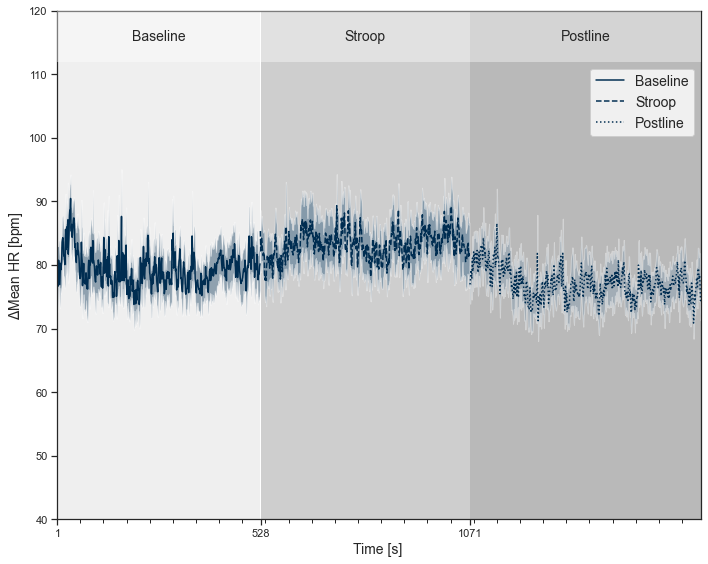

In [113]:
stroop.hr_ensemble_plot(data=dict_phase,figsize=(10,8),ylims=(40,120))

In [7]:
#Split 'dict_phase' into groups
dict_groups = stroop.split_groups(dict_phase,dict_condition)

['IG']
['IG', 'KG']


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:xlabel='Time [s] ', ylabel='$\\Delta$Mean HR [bpm]'>)

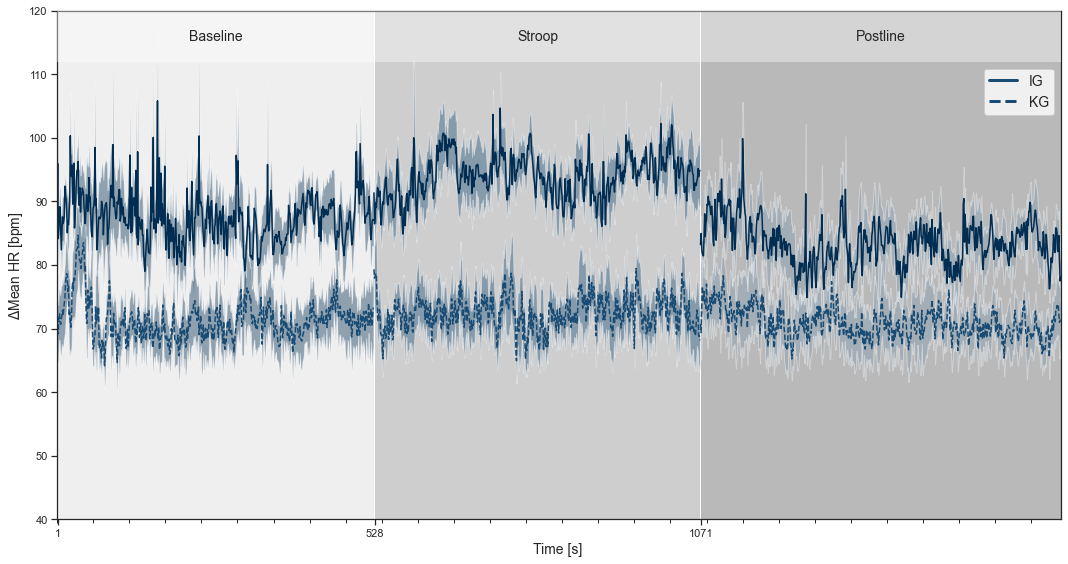

In [8]:
stroop.hr_ensemble_plot(data=dict_groups,figsize=(15,8),ylims=(40,120),is_group_dict=True)

#### Mean HR plot 

In [9]:
mean_se = stroop.hr_mean_se(data=dict_phase)

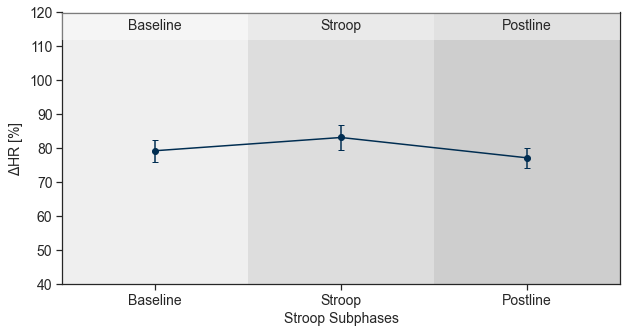

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(40,120)
ax = stroop.hr_mean_plot(data=mean_se, ax=ax)

In [11]:
mean_se_groups = stroop.hr_mean_se(data=dict_groups, is_group_dict=True)

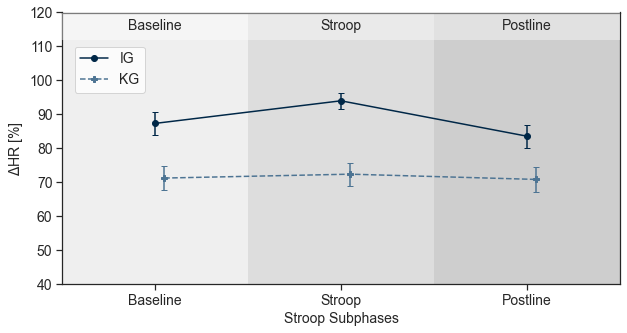

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(40,120)
ax = stroop.hr_mean_plot(data=mean_se_groups, ax=ax)

#### Stroop Data from Stroop Test 

In [33]:
#load stroop data from folder into a dictionary
folder = 'D:/Victoria/09- Studium/Master/DiPsyLab/social evaluated Stroop-Test - inkongruent/data/test/'
dict_stroop = stroop.load_stroop_test_data(folder=folder)

In [34]:
dict_stroop

{'VP13': {'stroop_results':      phase            propcorrect                    meanRT  \
  0  Stroop1  0,8717948717948718063  1036,0588235294117112062   
  1  Stroop2                      1   794,9487179487178991621   
  2  Stroop3  0,9487179487179486781   630,6756756756756203686   
  
     propcorrect_congruent propcorrect_incongruent    propcorrect_control  \
  0  0,9166666666666666297   0,8461538461538461453  0,8571428571428570953   
  1                      1                       1                      1   
  2  0,9230769230769231282   0,9285714285714286031                      1   
  
        meanRTcorr_congruent    meanRTcorr_incongruent        meanRTcorr_control  
  0  936,1818181818181301423  1035,8181818181817561708  1127,8333333333332575421  
  1  656,7999999999999545253   798,7142857142856655628   883,5333333333333030168  
  2                    714,5                       652                    523,75  ,
  'stroop_times': {'Stroop1': ('16:54:20', '16:55:41'),
   'Stroop2

In [35]:
#example of condition dict
condition_dict = {'IG': ['VP13'], 'KG': ['VP21']}

In [36]:
#split dict stroop into groups
dict_stroop_groups = stroop.split_groups_stroop(dict_stroop, condition_dict)
dict_stroop_groups

{'IG': {'VP13': {'stroop_results':      phase            propcorrect                    meanRT  \
   0  Stroop1  0,8717948717948718063  1036,0588235294117112062   
   1  Stroop2                      1   794,9487179487178991621   
   2  Stroop3  0,9487179487179486781   630,6756756756756203686   
   
      propcorrect_congruent propcorrect_incongruent    propcorrect_control  \
   0  0,9166666666666666297   0,8461538461538461453  0,8571428571428570953   
   1                      1                       1                      1   
   2  0,9230769230769231282   0,9285714285714286031                      1   
   
         meanRTcorr_congruent    meanRTcorr_incongruent        meanRTcorr_control  
   0  936,1818181818181301423  1035,8181818181817561708  1127,8333333333332575421  
   1  656,7999999999999545253   798,7142857142856655628   883,5333333333333030168  
   2                    714,5                       652                    523,75  ,
   'stroop_times': {'Stroop1': ('16:54:20', '16

In [37]:
#get mean response time and proportional correct answers of each participant
df_stroop = stroop.get_stroop_dataframe(dict_stroop=dict_stroop)
df_stroop

Subjects:   0%|          | 0/2 [00:00<?, ?it/s]

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['subject'] = subject_id


propcorrect       meanRT
subject phase                            
VP13    Stroop1     0.871795  1036.058824
        Stroop2     1.000000   794.948718
        Stroop3     0.948718   630.675676
VP21    Stroop1     0.897436   525.342857
        Stroop2     0.820513   513.312500
        Stroop3     0.794872   490.741935

In [38]:
#get mean response time and proportional correct answers of each participant per condition
df_stroop_groups = stroop.get_stroop_dataframe(dict_stroop=dict_stroop_groups, is_group_dict=True)
df_stroop_groups

Subjects:   0%|          | 0/2 [00:00<?, ?it/s]

Subjects:   0%|          | 0/1 [00:00<?, ?it/s]

c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['subject'] = subject_id
c:\users\vmueller\biopsykit\biopsykit\protocols\stroop.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['condition'] = condition


Subjects:   0%|          | 0/1 [00:00<?, ?it/s]

propcorrect       meanRT
condition subject phase                            
IG        VP13    Stroop1     0.871795  1036.058824
                  Stroop2     1.000000   794.948718
                  Stroop3     0.948718   630.675676
KG        VP21    Stroop1     0.897436   525.342857
                  Stroop2     0.820513   513.312500
                  Stroop3     0.794872   490.741935

In [39]:
stroop_mean = stroop.stroop_mean_se(df_stroop)

In [40]:
stroop_mean

,propcorrect_mean,meanRT_mean,propcorrect_std,meanRT_std
Stroop1,88.461538,780.700840,1.813094,361.130723
Stroop2,91.025641,654.130609,12.691660,199.146880
Stroop3,87.179487,560.708806,10.878566,98.948097


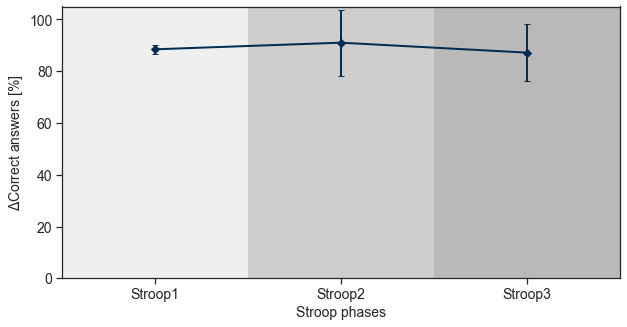

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = stroop.stroop_plot(stroop_mean,ax=ax, variable='propcorrect')

In [12]:
stroop_mean_group = stroop.stroop_mean_se(df_stroop_groups, True)

In [66]:
list(set(stroop_mean_group.index.get_level_values('condition')))


['IG', 'KG']

In [13]:
stroop_mean_group

,,meanRT_mean,meanRT_std,propcorrect_mean,propcorrect_std
phase,condition,,,,
Stroop1,IG,1036.058824,NaN,87.179487,NaN
Stroop2,IG,794.948718,NaN,100.000000,NaN
Stroop3,IG,630.675676,NaN,94.871795,NaN
Stroop1,KG,525.342857,NaN,89.743590,NaN
Stroop2,KG,513.312500,NaN,82.051282,NaN
Stroop3,KG,490.741935,NaN,79.487179,NaN


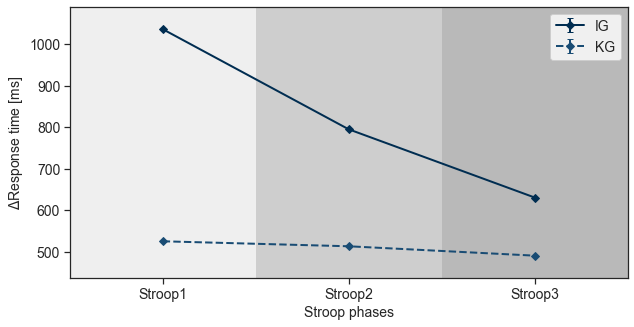

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
ax=stroop.stroop_plot(stroop_mean_group, ax=ax,is_group_dict=True,group_col='condition', variable='meanRT')